Si existe una relación entre la cantidad de horas que tus estudiantes estudian y las calificaciones que obtienen en un examen. Para hacerlo, decides recopilar datos de 20 estudiantes que tomaron un examen recientemente.

Horas de Estudio (X) | Notas del Examen (Y)
---------------------------------------------
      1.0                  60
      2.0                  65
      2.5                  70
      3.0                  75
      3.5                  80
      4.0                  85
      4.5                  90
      5.0                  95
      5.5                  100
      6.0                  105
      6.5                  110
      7.0                  115
      7.5                  120
      8.0                  125
      8.5                  130
      9.0                  135
      9.5                  140
     10.0                  145
     10.5                  150
     11.0                  155

Y (variable dependiente)
X (variable independiente)

## Regresión Lineal Simple y Múltiple

La regresión lineal simple se utiliza cuando tienes una sola variable independiente (X) que se utiliza para predecir una variable dependiente (Y). La regresión lineal múltiple se emplea cuando tienes dos o más variables independientes (X1, X2, X3, etc.) que se utilizan para predecir la variable dependiente (Y). El modelo de regresión lineal simple se puede representar como "y = mx + b", donde "m" es la pendiente de la línea y "b" es la intersección con el eje Y (ordenada al origen).

### Modelo Lineal

La ecuación "y = mx + b" es la representación de un modelo de regresión lineal simple, donde "y" es la variable dependiente, "x" es la variable independiente, "m" es la pendiente de la línea, y "b" es la intersección con el eje Y. En una regresión lineal múltiple, la ecuación sería más compleja, con múltiples coeficientes para las variables independientes.

### Error Cuadrático

El error cuadrático mide el error entre los valores predichos por el modelo y los valores reales. En una regresión, se utiliza la suma de los cuadrados de las diferencias entre los valores reales (Y) y los valores predichos (ŷ) para calcular el error cuadrático. La fórmula comúnmente utilizada es:

Error Cuadrático = Σ(Y - ŷ)²

El objetivo en la regresión lineal es minimizar este error cuadrático, ajustando los parámetros (pendiente y ordenada al origen) de la línea de regresión para que se ajuste lo mejor posible a los datos reales. 

In [1]:
pip install -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in /home/agustin/.local/lib/python3.8/site-packages (1.3.1)
Requirement already up-to-date: scipy in /home/agustin/.local/lib/python3.8/site-packages (1.10.1)
Requirement already up-to-date: matplotlib in /home/agustin/.local/lib/python3.8/site-packages (3.7.3)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# reshape(-1,1) empieza debe empezar en -1 para hacerlo mas entendible
hours_study = np.array([1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]).reshape(-1,1)
test_notes = np.array([55, 60, 63, 68, 70, 75, 72, 76, 80, 85, 83, 88, 92, 90, 95, 100, 97, 105, 110, 112])

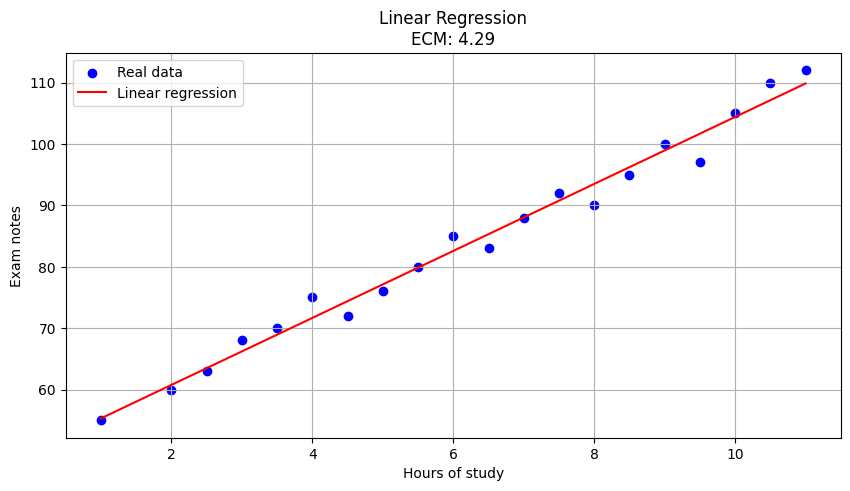

In [4]:
# La clase LinearRegression() proporciona una interfaz para ajustar y utilizar modelos de regresión lineal sin que necesites escribir manualmente las fórmulas matemáticas subyacentes.
model= LinearRegression()

# El método fit() se utiliza para entrenar el modelo con los datos proporcionados. Solicita las variables independientes y dependientes
model.fit(hours_study, test_notes)

# El método predict() se utiliza para hacer predicciones basadas en el modelo entrenado.
predicted_notes = model.predict(hours_study)

plt.figure(figsize=(10, 5))
plt.scatter(hours_study, test_notes, label='Real data', color='blue')

for i in range(len(hours_study)):
    plt.plot([hours_study[i],hours_study[i]],[test_notes[i],test_notes[i]],linestyle="--",color= "green", linewidth= 2)

plt.plot(hours_study, predicted_notes, label='Linear regression', color='red')

# Calcula el ECM
ecm = ((predicted_notes - test_notes) ** 2).mean()

# Muestra el valor del ECM en el título del gráfico
plt.title(f'Linear Regression\nECM: {ecm:.2f}')

plt.xlabel('Hours of study')
plt.ylabel('Exam notes')
plt.legend()
plt.grid(True)
plt.show()

Los puntos azules en el gráfico representan tus datos reales, donde el eje X muestra las horas de estudio y el eje Y muestra las notas de los exámenes.
La línea roja en diagonal representa la relación estimada entre las horas de estudio y las notas. La línea sigue una trayectoria similar a la dispersión de los puntos azules, esto sugiere que el modelo ha capturado adecuadamente la tendencia en los datos.
Los puntos azules están generalmente cerca de la línea roja, esto indica que el modelo está haciendo buenas predicciones. Sin embargo, si algunos puntos azules están significativamente alejados de la línea roja, podrían ser valores atípicos o puntos que el modelo no ha podido explicar bien.
La línea roja sobrepasa algunos puntos azules, esto sugiere que el modelo está haciendo predicciones demasiado altas en esos casos. Por otro lado, si algunos puntos azules están por encima de la línea roja, significa que el modelo está subestimando las notas en esos casos.
El ECM es una métrica que mide la diferencia cuadrada promedio entre las predicciones del modelo y los valores reales. En general, un valor de ECM más bajo indica que el modelo se ajusta mejor a los datos y produce predicciones más precisas. Un valor de Error Cuadrático Medio (ECM) de 4.29 indica que, en promedio, las predicciones del modelo de regresión lineal se desvían en 4.29 unidades cuadradas de las observaciones reales. Cuanto más bajo sea el valor del ECM, mejor será el ajuste del modelo a los datos. 

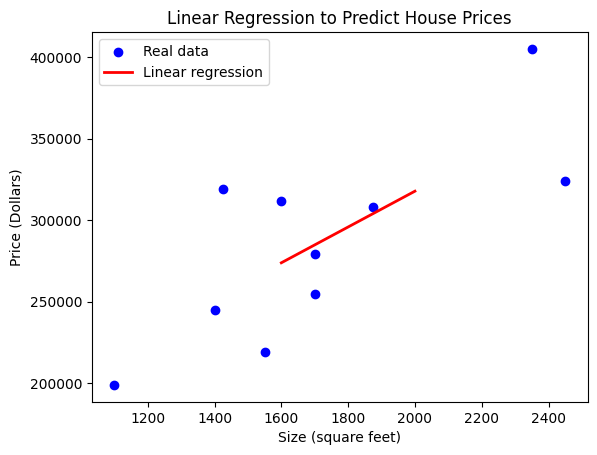

 For a house of 1600 square feet, the estimated price is $273876.71
 For a house of 1800 square feet, the estimated price is $295830.26
 For a house of 2000 square feet, the estimated price is $317783.81


In [5]:
# ==============================================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# ==============================================================================
# Datos de ejemplo (tamaño en pies cuadrados)
size = np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])

# ==============================================================================
# Precios correspondientes en dólares
price = np.array([245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000, 319000, 255000])

# ==============================================================================
# Crear un objeto de modelo de regresión lineal
model = LinearRegression()

# ==============================================================================
# Entrenar el modelo con los datos
model.fit(size.reshape(-1, 1), price)

#a=size.reshape(-1, 1)
#print(a)

# ==============================================================================
# Realizar predicciones
prediction_size = np.array([1600, 1800, 2000])
prediction_price = model.predict(prediction_size.reshape(-1, 1))


# ==============================================================================
# Visualizar los resultados
plt.scatter(size, price, color='blue', label='Real data')
plt.plot(prediction_size, prediction_price, color='red', linewidth=2, label='Linear regression')
plt.xlabel('Size (square feet)')
plt.ylabel('Price (Dollars)')
plt.legend()
plt.title('Linear Regression to Predict House Prices')
plt.show()


# ==============================================================================
# Imprimir las predicciones
for i in range(len(prediction_size)):
    print(f" For a house of {prediction_size[i]} square feet, the estimated price is ${prediction_price[i]:.2f}")

El código realiza un análisis de regresión lineal simple para predecir los precios de las casas en función de su tamaño. Los puntos azules están muy dispersos, esto sugiere que los precios de las casas no están fuertemente correlacionados con el tamaño de las casas en este conjunto de datos. En otras palabras, no hay una relación lineal clara entre el tamaño de las casas y los precios, lo que puede hacer que la predicción sea más difícil. 
La línea es corta y está en el centro, podría indicar que el modelo de regresión lineal no es un buen ajuste para los datos debido a la falta de una relación clara entre las variables. Podemos apreciar que el valor en dolares va a rondar por el sector de la linea roja. Esto es un valor aproximado. Una casa de 1600 metros cuadrados, su precio estimado es de 273876.